In [2]:
### INITIALIZE
%matplotlib notebook

# Import packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.animation import FuncAnimation
def mixed_update(b,d,mu,t,n,X,X_t,B):
    for t_step in range(t):
        cell_order=np.random.permutation(np.arange(0,n-1,1)) # Create random order of cells
        # Update the cells in random order 
        for cell_i in cell_order:
            # Update cell
            if np.random.rand() < d :   #Check if each cell dies
                X[cell_i]=0           
            if np.random.rand() < B[cell_i]: #Check if a cell splits
                if any(X==0): # Check if there is a space
                    new_loc = np.where(X==0)[0][0] # new cell assignment
                    X[new_loc] = X[cell_i] 
                    B[new_loc] = B[cell_i]
        X_t[:,t_step+1] = [sum(X==1),sum(X==2)]
    return X_t

def spatial_update(b,d,mu,t,n,X,X_t,B):
    for t_step in range(t):
        rows,cols = np.indices((n,n))
        coordinates = np.vstack((rows.flatten(), cols.flatten())).T
        cell_order = np.random.permutation(coordinates) # Create random order of cells
        # Update the cells in random order 
        for cell_i in cell_order:
            # Update cell
            if np.random.rand() < d :   #Check if each cell dies
                X[cell_i[0],cell_i[1]]=0           
            if np.random.rand() < B[cell_i[0],cell_i[1]]: #Check if a cell splits
                neighbors = np.array([1,1,1,1])
                if cell_i[1]-1 >= 0: neighbors[0]=X[cell_i[0],cell_i[1]-1]
                if cell_i[1]+1 < n: neighbors[1]=X[cell_i[0],cell_i[1]+1]
                if cell_i[0]-1 >= 0: neighbors[2]=X[cell_i[0]-1,cell_i[1]]
                if cell_i[0]+1 < n: neighbors[3]=X[cell_i[0]+1,cell_i[1]] 
                if any(neighbors==0): # Check if there is a space
                    locs = np.array([[cell_i[0],cell_i[1]-1],[cell_i[0],cell_i[1]+1],[cell_i[0]-1,cell_i[1]],[cell_i[0]+1,cell_i[1]]])
                    new_loc = locs[np.random.choice(np.where(neighbors==0)[0])] # new cell assignment
                    X[new_loc[0],new_loc[1]] = X[cell_i[0],cell_i[1]] 
                    B[new_loc[0],new_loc[1]] = B[cell_i[0],cell_i[1]]
        X_t[:,:,t_step+1] = X
    return X_t

<IPython.core.display.Javascript object>


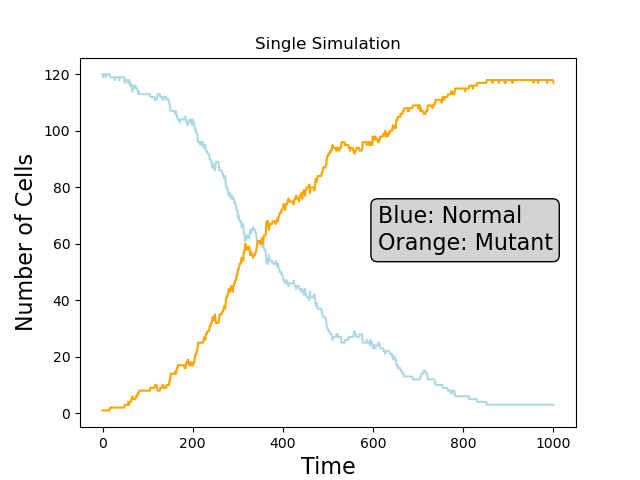

<IPython.core.display.Javascript object>


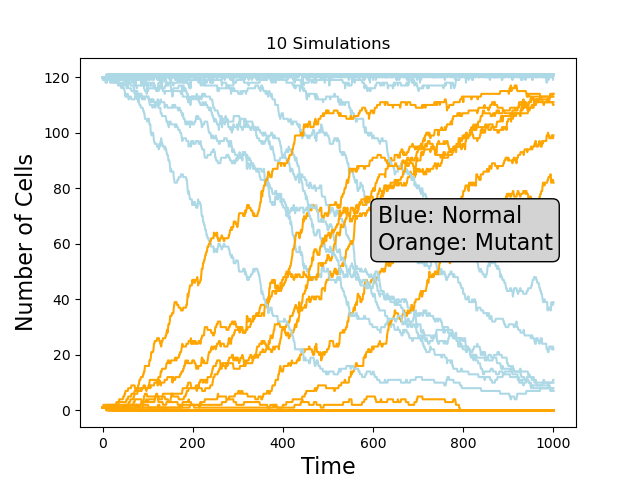

In [23]:
### WELL-MIXED SIMULATION 
# Set parameter values
b = 0.1 #birth rate
d = 0.01  # death rate
mu = 2  # mutation birth rate advantage - MAX VALUE mu*b=1
t = 1000 # simulation time

## Run a single simulation
# Instantiate Population
n = 121 # population size (21*21)
X = np.ones(n,dtype = int); X[0]=2  # Create population vector - 0=dead,1=normal,2=mutated
Xm_t = np.zeros((2,t+1),dtype=int);Xm_t[:,0]= [sum(X==1),sum(X==2)] # population over time - row 0 = sum of normal population, row 1 = sum of mutant population
B = b*np.ones(n,dtype=int);B[0]= B[0]*mu # Create birth rate vector

# Iterate the population over time
Xm_t = mixed_update(b,d,mu,t,n,X,Xm_t,B)
# Plot population of normal cells and cancer cells
fig1,ax1=plt.subplots()
ax1.plot(range(t+1), Xm_t[0],color="lightblue")
ax1.plot(range(t+1), Xm_t[1],color="orange")
textstr = "Blue: Normal\nOrange: Mutant"
props = dict(boxstyle='round', facecolor='lightgrey', alpha=1)  # Text box properties
ax1.set_xlabel('Time',fontsize=16)
ax1.set_ylabel('Number of Cells',fontsize=16)
plt.text(0.6, 0.6, textstr, transform=plt.gca().transAxes, fontsize=16,
         verticalalignment='top', bbox=props)
ax1.set_title("Single Simulation")



## Run 10 simulations
fig2,ax2=plt.subplots()
for sim_i in range(20): # Run multiple simulations

    # Instantiate Population
    n = 121 # population size (21*21)
    X = np.ones(n,dtype = int); X[0]=2  # Create population vector - 0=dead,1=normal,2=mutated
    Xm_t = np.zeros((2,t+1),dtype=int);Xm_t[:,0]= [sum(X==1),sum(X==2)] # population over time - row 0 = sum of normal population, row 1 = sum of mutant population
    B = b*np.ones(n,dtype=int);B[0]= B[0]*mu # Create birth rate vector

    # Iterate the population over time
    Xm_t = mixed_update(b,d,mu,t,n,X,Xm_t,B)
    # Plot population of normal cells and cancer cells
    ax2.plot(range(t+1), Xm_t[0],color="lightblue")
    ax2.plot(range(t+1), Xm_t[1],color="orange")
    

textstr = "Blue: Normal\nOrange: Mutant"
props = dict(boxstyle='round', facecolor='lightgrey', alpha=1)  # Text box properties
ax2.set_xlabel('Time',fontsize=16)
ax2.set_ylabel('Number of Cells',fontsize=16)
ax2.set_title("10 Simulations")
plt.text(0.6, 0.6, textstr, transform=plt.gca().transAxes, fontsize=16,
         verticalalignment='top', bbox=props)
plt.show()

<IPython.core.display.Javascript object>


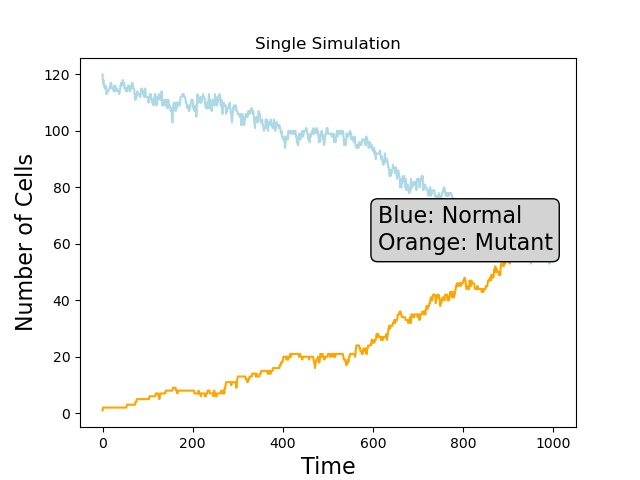

<IPython.core.display.Javascript object>


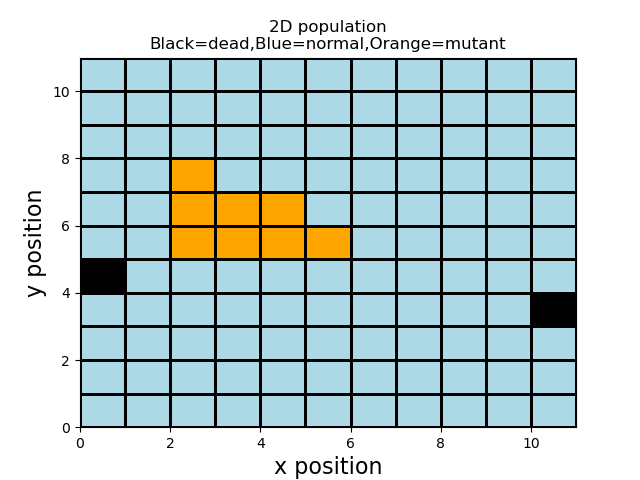

<IPython.core.display.Javascript object>


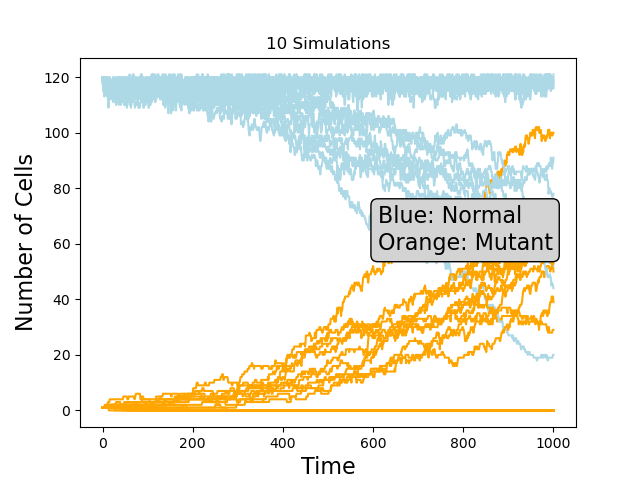

In [24]:
### SPATIAL SIMULATION
# Set parameter values
b = 0.1 #birth rate
d = 0.01  # death rate
mu = 2  # mutation birth rate advantage - MAX VALUE mu*b=1
t = 1000 # simulation time


## Run a single simulation
n = 11 # population size (11*11 = 121)
X = np.ones((n,n),dtype = int); X[5,5]=2  # Create population vector - 0=dead,1=normal,2=mutated
Xs_t = np.zeros((n,n,t+1),dtype=int);Xs_t[:,:,0]= X # population over time - row 0 = sum of normal population, row 1 = sum of mutant population
B = b*np.ones((n,n),dtype=int);B[5,5]= B[5,5]*mu # Create birth rate vector

# Iterate the population over time
Xs_t = spatial_update(b,d,mu,t,n,X,Xs_t,B)
# Plot population of normal cells and cancer cells
fig3,ax3=plt.subplots()
ax3.plot(range(t+1), sum(sum(Xs_t==1)),color="lightblue")
ax3.plot(range(t+1), sum(sum(Xs_t==2)),color="orange")    
textstr = "Blue: Normal\nOrange: Mutant"
props = dict(boxstyle='round', facecolor='lightgrey', alpha=1)  # Text box properties
ax3.set_xlabel('Time',fontsize=16)
ax3.set_ylabel('Number of Cells',fontsize=16)
ax3.set_title('Single Simulation')
plt.text(0.6, 0.6, textstr, transform=plt.gca().transAxes, fontsize=16,
         verticalalignment='top', bbox=props)
# Plot the 2D population over time
cmap =ListedColormap(["black","lightblue","orange"])
X_T=Xs_t.transpose(2,0,1)
fig4, ax4 = plt.subplots()
c = ax4.pcolormesh(X_T[0],edgecolors='k',linewidth=2,cmap=cmap,vmin=0,vmax=2)
def update(frame):
    c.set_array(X_T[frame].flatten())
    return c,
ani=FuncAnimation(fig4,update,frames=range(500),interval=100,blit=True)
ax4.set_title("2D population\nBlack=dead,Blue=normal,Orange=mutant")
ax4.set_xlabel("x position",fontsize=16)
ax4.set_ylabel("y position",fontsize=16)



## Run 10 simulations
fig5, ax5 = plt.subplots()
for sim_i in range(20): # Run multiple simulations

    # Instantiate Population
    n = 11 # population size (21*21)
    X = np.ones((n,n),dtype = int); X[5,5]=2  # Create population vector - 0=dead,1=normal,2=mutated
    Xs_t = np.zeros((n,n,t+1),dtype=int);Xs_t[:,:,0]= X # population over time - row 0 = sum of normal population, row 1 = sum of mutant population
    B = b*np.ones((n,n),dtype=int);B[5,5]= B[5,5]*mu # Create birth rate vector

    # Iterate the population over time
    Xs_t = spatial_update(b,d,mu,t,n,X,Xs_t,B)
    # Plot population of normal cells and cancer cells
    ax5.plot(range(t+1), sum(sum(Xs_t==1)),color="lightblue")
    ax5.plot(range(t+1), sum(sum(Xs_t==2)),color="orange")    

textstr = "Blue: Normal\nOrange: Mutant"
props = dict(boxstyle='round', facecolor='lightgrey', alpha=1)  # Text box properties
ax5.set_xlabel('Time',fontsize=16)
ax5.set_ylabel('Number of Cells',fontsize=16)
ax5.set_title('10 Simulations')
ax5.text(0.6, 0.6, textstr, transform=plt.gca().transAxes, fontsize=16,
         verticalalignment='top', bbox=props)
plt.show()

<IPython.core.display.Javascript object>


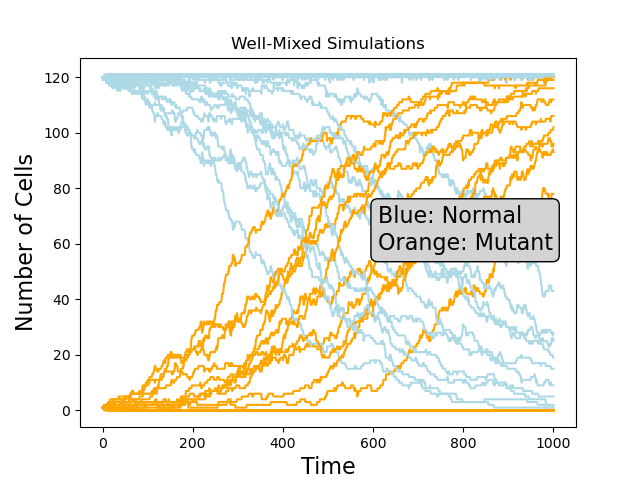

<IPython.core.display.Javascript object>


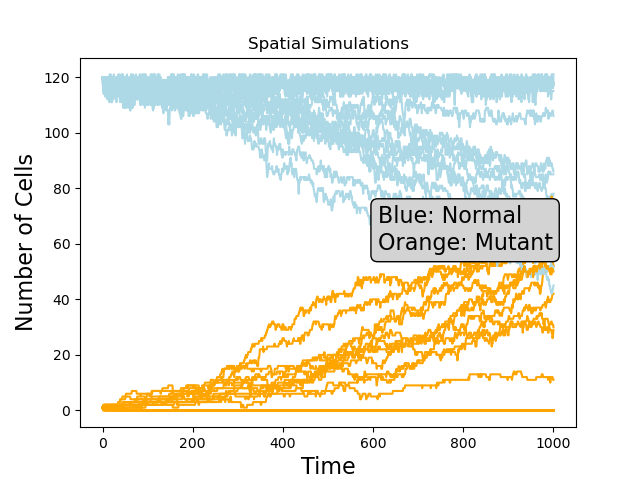

In [30]:
### BOTH SIMULATIONS 
# Set parameter values
b = 0.1 #birth rate
d = 0.01  # death rate
mu = 2  # mutation birth rate advantage - MAX VALUE - mu*b=1
t = 1000 # simulation time
number_simulations = 20 # number of simulations

## Run simulations
fig6,ax6=plt.subplots()
for sim_i in range(number_simulations): # Run multiple simulations

    # Instantiate Population
    n = 121 # population size (21*21)
    X = np.ones(n,dtype = int); X[0]=2  # Create population vector - 0=dead,1=normal,2=mutated
    Xm_t = np.zeros((2,t+1),dtype=int);Xm_t[:,0]= [sum(X==1),sum(X==2)] # population over time - row 0 = sum of normal population, row 1 = sum of mutant population
    B = b*np.ones(n,dtype=int);B[0]= B[0]*mu # Create birth rate vector

    # Iterate the population over time
    Xm_t = mixed_update(b,d,mu,t,n,X,Xm_t,B)
    # Plot population of normal cells and cancer cells
    ax6.plot(range(t+1), Xm_t[0],color="lightblue")
    ax6.plot(range(t+1), Xm_t[1],color="orange")
    

textstr = "Blue: Normal\nOrange: Mutant"
props = dict(boxstyle='round', facecolor='lightgrey', alpha=1)  # Text box properties
ax6.set_xlabel('Time',fontsize=16)
ax6.set_ylabel('Number of Cells',fontsize=16)
ax6.set_title("Well-Mixed Simulations")
plt.text(0.6, 0.6, textstr, transform=plt.gca().transAxes, fontsize=16,
         verticalalignment='top', bbox=props)


## Run simulations
fig7, ax7 = plt.subplots()
for sim_i in range(number_simulations): # Run multiple simulations

    # Instantiate Population
    n = 11 # population size (21*21)
    X = np.ones((n,n),dtype = int); X[5,5]=2  # Create population vector - 0=dead,1=normal,2=mutated
    Xs_t = np.zeros((n,n,t+1),dtype=int);Xs_t[:,:,0]= X # population over time - row 0 = sum of normal population, row 1 = sum of mutant population
    B = b*np.ones((n,n),dtype=int);B[5,5]= B[5,5]*mu # Create birth rate vector

    # Iterate the population over time
    Xs_t = spatial_update(b,d,mu,t,n,X,Xs_t,B)
    # Plot population of normal cells and cancer cells
    ax7.plot(range(t+1), sum(sum(Xs_t==1)),color="lightblue")
    ax7.plot(range(t+1), sum(sum(Xs_t==2)),color="orange")    

textstr = "Blue: Normal\nOrange: Mutant"
props = dict(boxstyle='round', facecolor='lightgrey', alpha=1)  # Text box properties
ax7.set_xlabel('Time',fontsize=16)
ax7.set_ylabel('Number of Cells',fontsize=16)
ax7.set_title('Spatial Simulations')
ax7.text(0.6, 0.6, textstr, transform=plt.gca().transAxes, fontsize=16,
         verticalalignment='top', bbox=props)
plt.show()
